In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heartdiease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(target):
    if target == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

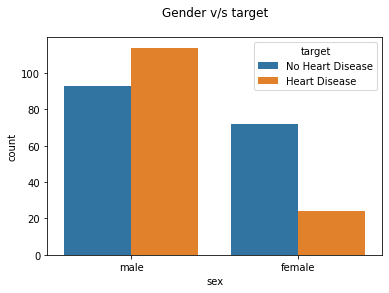

In [8]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

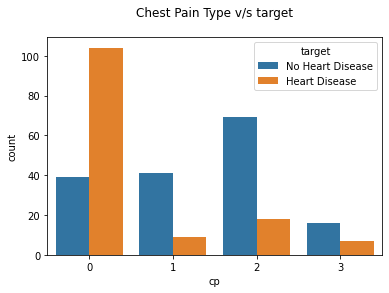

In [9]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

[]

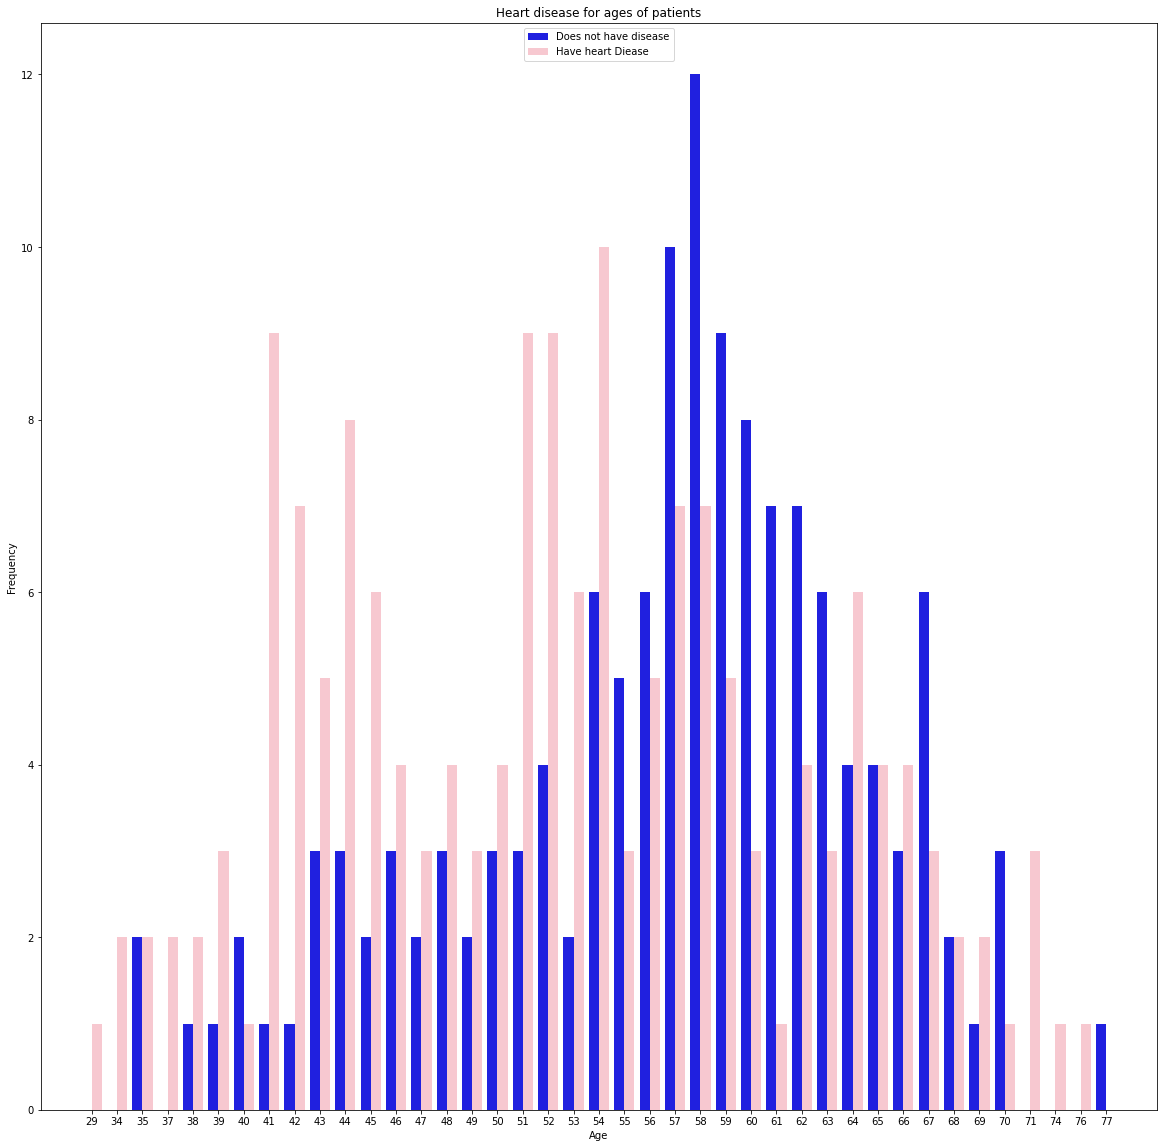

In [10]:
plt.figure(figsize=(20,20))
sns.countplot(x='age', hue='target', data = df, palette = ['blue','pink'])
plt.legend(['Does not have disease','Have heart Diease'])
plt.title('Heart disease for ages of patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot()

[]

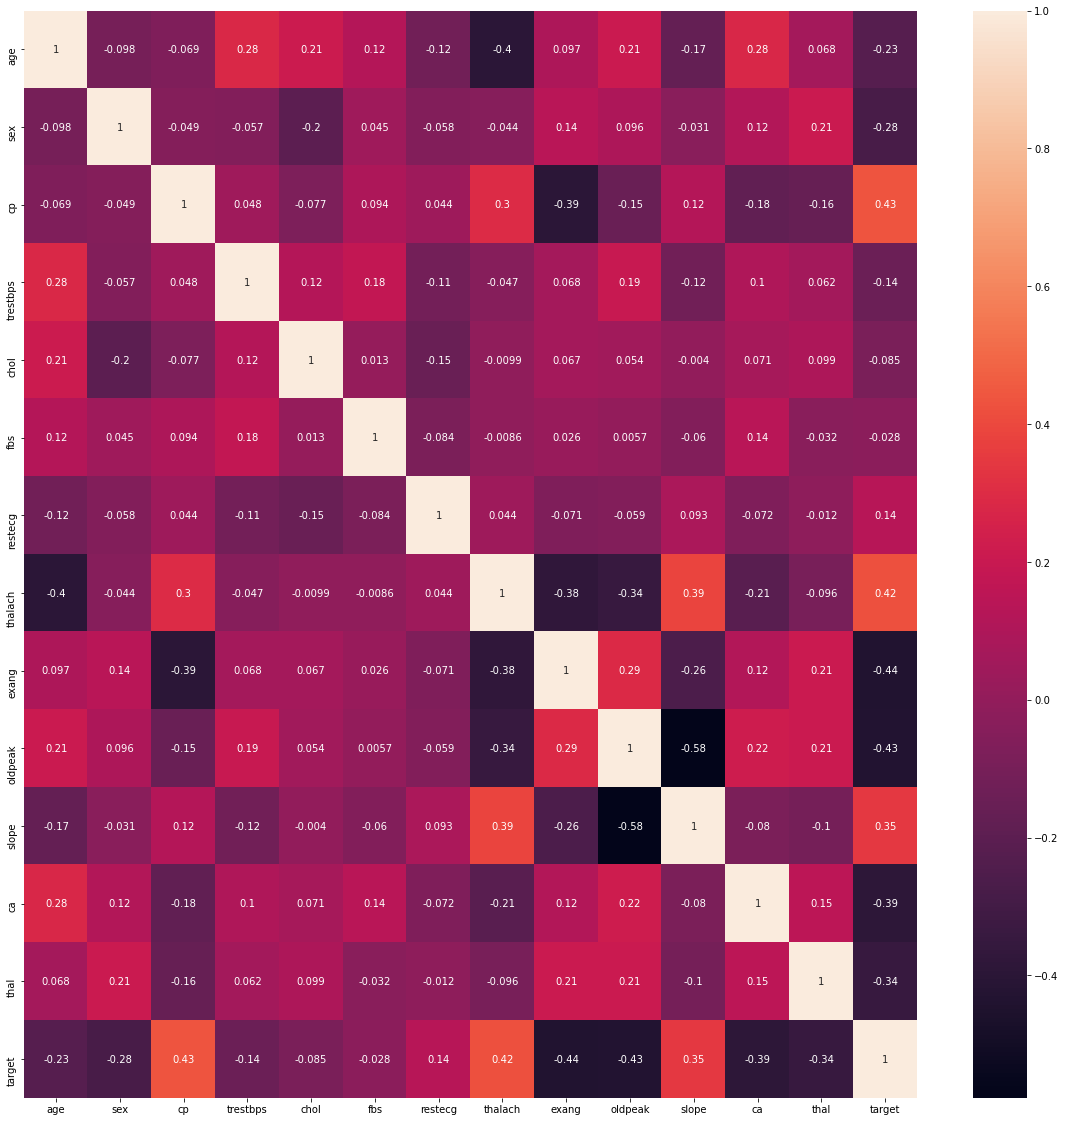

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)
plt.plot()

# Logistic Regression

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [16]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2


In [17]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3


In [18]:
clf = LogisticRegression()

In [19]:
clf.fit(x_train, y_train)

C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = clf.predict(x_test)

In [21]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [22]:
log_score = accuracy_score(y_test, y_pred)

In [23]:
log_score

0.8131868131868132

In [24]:
log_cm = confusion_matrix(y_test,y_pred)

In [25]:
log_cm

array([[29, 11],
       [ 6, 45]], dtype=int64)

# Decision Tree

In [26]:
clf = DecisionTreeClassifier()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [28]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(x_test)

In [30]:
dec_score = accuracy_score(y_test,y_pred)

In [31]:
dec_cm = confusion_matrix(y_test,y_pred)

In [32]:
dec_score

0.7142857142857143

In [33]:
dec_cm

array([[28, 15],
       [11, 37]], dtype=int64)

# Random Forest

In [34]:
clf = RandomForestClassifier()

In [35]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred= clf.predict(x_test)

In [37]:
rf_score = accuracy_score(y_test,y_pred)

In [38]:
rf_score

0.8571428571428571

In [39]:
rf_cm = confusion_matrix(y_test,y_pred)

In [40]:
rf_cm

array([[34,  9],
       [ 4, 44]], dtype=int64)

# Model Comparision

In [41]:
scores_dic = {'LogisticRegression':[log_score],'DecisionTree':[dec_score],'RandomFroest':[rf_score]}

In [42]:
score_df = pd.DataFrame(scores_dic)

In [43]:
score_df

,LogisticRegression,DecisionTree,RandomFroest
0,0.813187,0.714286,0.857143


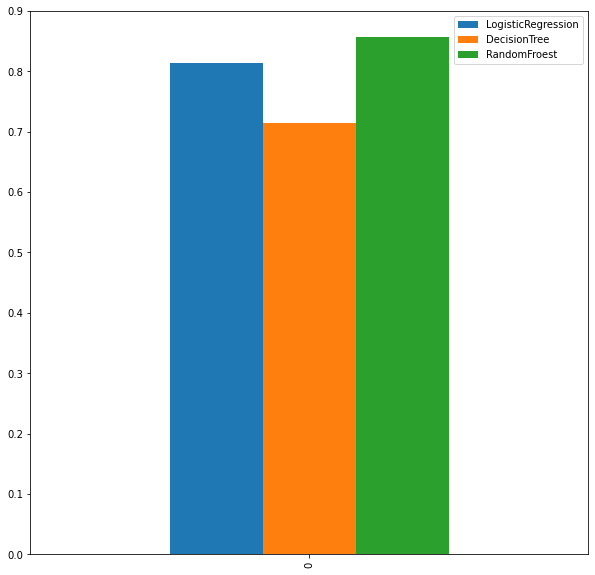

In [44]:
score_df.plot(kind='bar', figsize=(10,10))

In [45]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.894737,0.830189,0.857143,0.862463,0.860689
recall,0.790698,0.916667,0.857143,0.853682,0.857143
f1-score,0.839506,0.871287,0.857143,0.855397,0.856270
support,43.000000,48.000000,0.857143,91.000000,91.000000
